Abhinand Satish - Nuclear Instrumentation and measurement Project 1

In [106]:
%pip install beautifulsoup4 requests pandas numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:

import matplotlib.pyplot as plt
import os
import sys
import csv
import numpy as np
import pandas as pd
import requests

In [108]:
#Load print the text file /Users/abhinandsatish/Documents/2025/Spring/NIM/7314376.txt
# Load and print the text file /Users/abhinandsatish/Documents/2025/Spring/NIM/7314376.txt
path, dirs, files = next(os.walk("./"))   # 'This Folder'
file_count = len(files)

# Reading input
data = []
with open("7314376.txt") as f:
    lines = f.readlines()
    for line in lines[2:]:
        data.append(line.split())
    f.close()

# Create a DataFrame
df = pd.DataFrame(data, columns=['Photon_Energy_Kev', 'Emission_intensity_[%]'])
df['Photon_Energy_Kev'] = df['Photon_Energy_Kev'].astype(float)
df['Emission_intensity_[%]'] = df['Emission_intensity_[%]'].astype(float)

# Save to CSV
df.to_csv('7314376.csv', index=False)
print(df.head())


   Photon_Energy_Kev  Emission_intensity_[%]
0             304.00                  0.0259
1             304.43                  0.0340
2             333.37                  0.0640
3             334.80                  0.0320
4             334.90                  0.0550


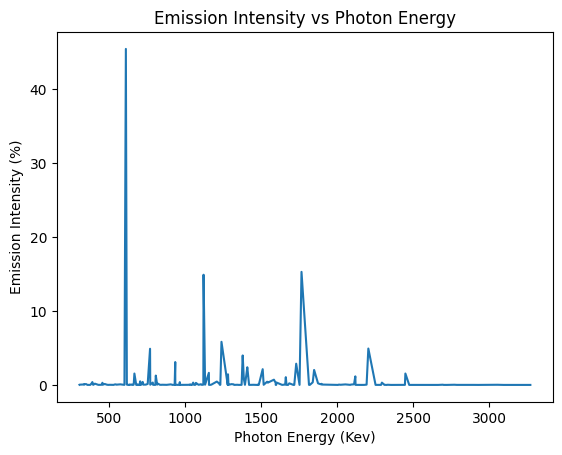

In [109]:
# Plotting
plt.plot(df['Photon_Energy_Kev'], df['Emission_intensity_[%]'])
plt.xlabel('Photon Energy (Kev)')
plt.ylabel('Emission Intensity (%)')
plt.title('Emission Intensity vs Photon Energy')
plt.show()



ASSUMPTIONS:
1. The radioisotope is a point source.
2. The intrinsic detection efficiency is 1.
3. The detector is fast enough such that no counts are lost due to deadtime.
4. The detector is a 3” diameter cylindrical detector that is facing the point source.
5. We will assume that we have good geometry due to a series of collimators installed
in our experimental facility (ignore buildup factors).
6. The source has an activity of 1 Ci, and the rate of activity change is negligible over the
course of the experiment.




**$I = I_0 e^{-\mu x}$**
Linear Attenuation coefficient  = **$\mu = \left(\frac{\mu}{\rho}\right) \times \text{density}$**
where **$\left(\frac{\mu}{\rho}\right)$** is the mass attenutation which I would derive from the NIST database

The density for Led and Aluminium is:

Lead (Pb) = 11.34 g/cm^3

Aluminium(Al) = 2.7g/cm^3

Total Initial Intensity: 4.88e+10 photons/s
Distance: 10 cm, Geometric Efficiency: 0.032764, Detected Intensity: 1.60e+09 counts/s
Distance: 20 cm, Geometric Efficiency: 0.008833, Detected Intensity: 4.31e+08 counts/s
Distance: 50 cm, Geometric Efficiency: 0.001445, Detected Intensity: 7.05e+07 counts/s
Distance: 80 cm, Geometric Efficiency: 0.000566, Detected Intensity: 2.76e+07 counts/s
Distance: 100 cm, Geometric Efficiency: 0.000363, Detected Intensity: 1.77e+07 counts/s


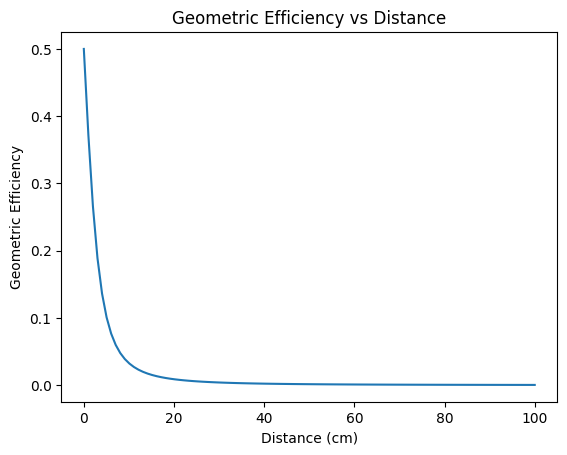

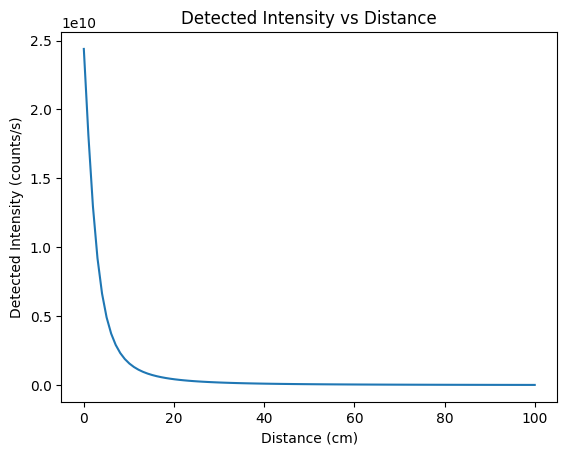

In [110]:
#Getting intial intensity using the data frame created for photon energy and emission intensity

#convert to data fram
df = pd.read_csv('7314376.csv')
df['Photon_Energy_Kev'] = df['Photon_Energy_Kev'].astype(float)
df['Emission_intensity_[%]'] = df['Emission_intensity_[%]'].astype(float)
# Activity of the source (1 Ci = 3.7e10 decays per second)
activity = 3.7e10  # 1 Ci
# Calculate the initial intensity
df['Initial_Intensity'] = activity * df['Emission_intensity_[%]'] / 100

# Total initial intensity is the sum of photons emitted per second from all energies
total_initial_intensity = df['Initial_Intensity'].sum()
print(f"Total Initial Intensity: {total_initial_intensity:.2e} photons/s")

# Detector radius in cm (3-inch diameter converted to cm)
detector_radius = 3 * 2.54 / 2

# Function to calculate geometric efficiency
def geometric_efficiency(detector_radius, distance):
    return 0.5 * (1 - (distance / np.sqrt(distance**2 + detector_radius**2)))

# Example: Calculate the detected intensity for different distances
distances = [10, 20, 50, 80, 100]

for distance in distances:
    # Calculate the geometric efficiency
    epsilon = geometric_efficiency(detector_radius, distance)
    
    # Calculate the detected intensity
    detected_intensity = total_initial_intensity * epsilon
    print(f"Distance: {distance} cm, Geometric Efficiency: {epsilon:.6f}, Detected Intensity: {detected_intensity:.2e} counts/s")

# Plot the geometric efficiency
distances = np.linspace(0, 100, 100)
geometric_efficiencies = [geometric_efficiency(detector_radius, d) for d in distances]

plt.plot(distances, geometric_efficiencies)
plt.xlabel('Distance (cm)')
plt.ylabel('Geometric Efficiency')
plt.title('Geometric Efficiency vs Distance')
plt.show()

# Plot the detected intensity
detected_intensities = [total_initial_intensity * geometric_efficiency(detector_radius, d) for d in distances]

plt.plot(distances, detected_intensities)
plt.xlabel('Distance (cm)')
plt.ylabel('Detected Intensity (counts/s)')
plt.title('Detected Intensity vs Distance')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

#put detected intensities in a data frame
df_detected = pd.DataFrame({'Distance (cm)': distances, 'Detected Intensity (counts/s)': detected_intensities})
df_detected.to_csv('detected_intensities.csv', index=False)

In [111]:
#laading attenuation data to csv
path, dirs, files = next(os.walk("./"))   # 'This Folder'
file_count = len(files)

# Reading input
data = []
with open("Aluminum_attenuation.txt", encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines[2:]:
        data.append(line.split())
    f.close()
    
# Create a DataFrame
df = pd.DataFrame(data, columns=['Energy_Mev', 'μ/ρ(cm2/g) '])

# Save to CSV
df.to_csv('Aluminum_attenuation.csv', index=False)
print(df.head())


#now the same for lead_attenuation.txt
path, dirs, files = next(os.walk("./"))   # 'This Folder'
file_count = len(files)

# Reading input
data = []
with open("lead_attenuation.txt", encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines[2:]:
        data.append(line.split())
    f.close()

# Create a DataFrame
df = pd.DataFrame(data, columns=['Energy_Mev', 'μ/ρ(cm2/g) '])

# Save to CSV
df.to_csv('lead_attenuation.csv', index=False)
print(df.head())


    Energy_Mev μ/ρ(cm2/g) 
0  1.50000E-03   4.022E+02
1  1.55960E-03   3.957E+03
2  2.00000E-03   2.263E+03
3  3.00000E-03   7.880E+02
4  4.00000E-03   3.605E+02
    Energy_Mev μ/ρ(cm2/g) 
0  1.50000E-03   2.356E+03
1  2.00000E-03   1.285E+03
2  2.48400E-03   8.006E+02
3  2.48400E-03   1.397E+03
4  2.53429E-03   1.726E+03


   Energy_Mev  μ/ρ(cm2/g)   Energy_Kev
0     0.00150        402.2      1.5000
1     0.00156       3957.0      1.5596
2     0.00200       2263.0      2.0000
3     0.00300        788.0      3.0000
4     0.00400        360.5      4.0000


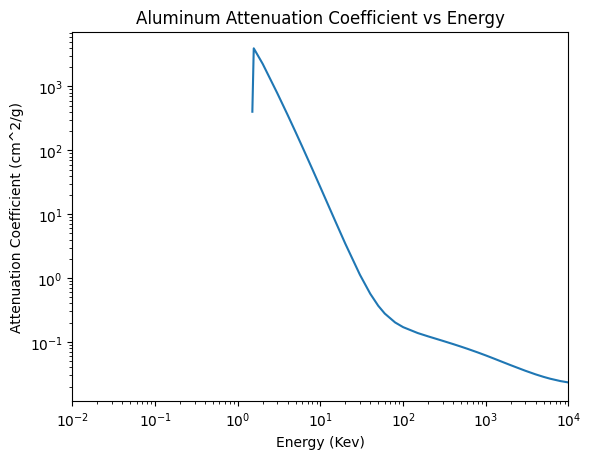

In [112]:
#ALUMINUM ATTENUATION
#Now first we will convert the aluminum attenuation data to a data frame and into Kev
df = pd.read_csv('Aluminum_attenuation.csv')
df['Energy_Mev'] = df['Energy_Mev'].astype(float)
df['μ/ρ(cm2/g) '] = df['μ/ρ(cm2/g) '].astype(float)

# Convert energy from MeV to keV
df['Energy_Kev'] = df['Energy_Mev']
df['Energy_Kev'] = df['Energy_Kev'] * 1e3

print(df.head())
#i want the x axis to be in log scale from 10^-1 to 10^4
plt.plot(df['Energy_Kev'], df['μ/ρ(cm2/g) '])
plt.xlabel('Energy (Kev)')
plt.ylabel('Attenuation Coefficient (cm^2/g)')
plt.title('Aluminum Attenuation Coefficient vs Energy')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2, 1e4)

plt.show()




   Photon_Energy_Kev  Emission_intensity_[%]  Interpolated_μ/ρ(cm2/g)
0             304.00                  0.0259                 0.103742
1             304.43                  0.0340                 0.103693
2             333.37                  0.0640                 0.100382
3             334.80                  0.0320                 0.100219
4             334.90                  0.0550                 0.100207


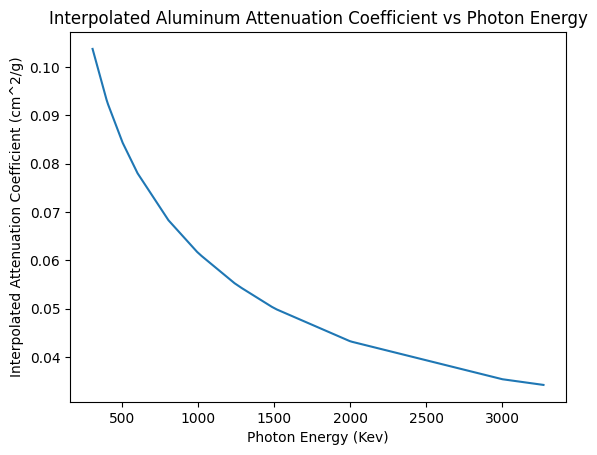

In [113]:
#Now I want to linearly interpolate the data to get the attenuation coefficient for each photon energy in the emission spectrum
# Linear interpolation
from scipy.interpolate import interp1d

# Ensure the dataframe df contains the Energy_Kev column
df_aluminum = pd.read_csv('Aluminum_attenuation.csv')
df_aluminum['Energy_Mev'] = df_aluminum['Energy_Mev'].astype(float)
df_aluminum['μ/ρ(cm2/g) '] = df_aluminum['μ/ρ(cm2/g) '].astype(float)
df_aluminum['Energy_Kev'] = df_aluminum['Energy_Mev'] * 1e3

# Load the photon energy and emission intensity data
df_photon = pd.read_csv('7314376.csv')
df_photon['Photon_Energy_Kev'] = df_photon['Photon_Energy_Kev'].astype(float)
df_photon['Emission_intensity_[%]'] = df_photon['Emission_intensity_[%]'].astype(float)

# Interpolate the attenuation coefficient
interpolator = interp1d(df_aluminum['Energy_Kev'], df_aluminum['μ/ρ(cm2/g) '], kind='linear', fill_value='extrapolate')
# Interpolate the attenuation coefficient for each photon energy in the emission spectrum
df_photon['Interpolated_μ/ρ(cm2/g)'] = interpolator(df_photon['Photon_Energy_Kev'])

print(df_photon.head())
# Plot the interpolated attenuation coefficient
plt.plot(df_photon['Photon_Energy_Kev'], df_photon['Interpolated_μ/ρ(cm2/g)'])
plt.xlabel('Photon Energy (Kev)')
plt.ylabel('Interpolated Attenuation Coefficient (cm^2/g)')
plt.title('Interpolated Aluminum Attenuation Coefficient vs Photon Energy')
plt.show()




Distance: 10 cm, Detected Intensity: 1.60e+09 photons/s, Required Aluminum Thickness: 5.10e+01 cm
Distance: 20 cm, Detected Intensity: 4.31e+08 photons/s, Required Aluminum Thickness: 4.20e+01 cm
Distance: 50 cm, Detected Intensity: 7.05e+07 photons/s, Required Aluminum Thickness: 2.94e+01 cm
Distance: 80 cm, Detected Intensity: 2.76e+07 photons/s, Required Aluminum Thickness: 2.30e+01 cm
Distance: 100 cm, Detected Intensity: 1.77e+07 photons/s, Required Aluminum Thickness: 1.99e+01 cm
  Distance (cm)  Aluminum_Thickness (cm)
0            10                51.034931
1            20                41.966125
2            50                29.442905
3            80                22.957911
4           100                19.874577


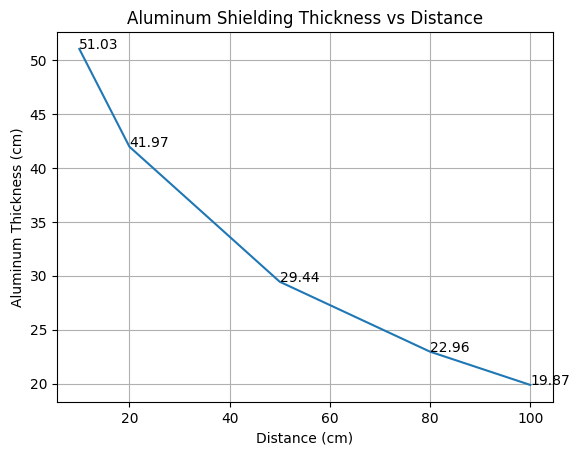

In [114]:
#Now for aluminum shielding thickness
# Calculate the thickness of aluminum required to reduce the detected intensity to 1e6 counts/s for each distance, 
# we need to assume a thickness of aluminum and calculate the detected intensity and see if the sum of all the detected intensities * geometric efficiency is less than or equal to 1e6
# First convert mass attenuation coefficient to linear attenuation coefficient from the interpolated data
density_aluminum = 2.7  # g/cm^3
df_photon['Linear_Attenuation_Coefficient'] = df_photon['Interpolated_μ/ρ(cm2/g)'] * density_aluminum

# Calculate the thickness of aluminum required to reduce the detected intensity to 1e6 counts/s
target_intensity = 1e6  # counts/s
df_aluminum_thickness = pd.DataFrame(columns=['Distance (cm)', 'Aluminum_Thickness (cm)'])

for distance in [10, 20, 50, 80, 100]:
    # Calculate the geometric efficiency
    epsilon = geometric_efficiency(detector_radius, distance)
    
    # Calculate the detected intensity
    detected_intensity = total_initial_intensity * epsilon #this is the intensity that is detected without any shielding from earlier
    
    # Calculate the thickness of aluminum required
    thickness = -np.log(target_intensity / detected_intensity) / df_photon['Linear_Attenuation_Coefficient'] #this is summing the attenuation coefficient for all the energies and finding the thickness
    # Append to the DataFrame
    df_aluminum_thickness = pd.concat([df_aluminum_thickness, pd.DataFrame({'Distance (cm)': [distance], 'Aluminum_Thickness (cm)': [thickness.mean()]})], ignore_index=True)
    if distance == 10:
        print(f"Distance: {distance} cm, Detected Intensity: {detected_intensity:.2e} photons/s, Required Aluminum Thickness: {thickness.mean():.2e} cm")
    if distance == 20:
        print(f"Distance: {distance} cm, Detected Intensity: {detected_intensity:.2e} photons/s, Required Aluminum Thickness: {thickness.mean():.2e} cm")
        
    if distance == 50:
        print(f"Distance: {distance} cm, Detected Intensity: {detected_intensity:.2e} photons/s, Required Aluminum Thickness: {thickness.mean():.2e} cm")
    if distance == 80:
        print(f"Distance: {distance} cm, Detected Intensity: {detected_intensity:.2e} photons/s, Required Aluminum Thickness: {thickness.mean():.2e} cm")
    if distance == 100:
        print(f"Distance: {distance} cm, Detected Intensity: {detected_intensity:.2e} photons/s, Required Aluminum Thickness: {thickness.mean():.2e} cm")
    
print(df_aluminum_thickness)
plt.plot(df_aluminum_thickness['Distance (cm)'], df_aluminum_thickness['Aluminum_Thickness (cm)'])
plt.xlabel('Distance (cm)')
plt.ylabel('Aluminum Thickness (cm)')
plt.title('Aluminum Shielding Thickness vs Distance')
#put points on the graph for the 5 points
for i, txt in enumerate(df_aluminum_thickness['Aluminum_Thickness (cm)']):
    plt.annotate(f"{txt:.2f}", (df_aluminum_thickness['Distance (cm)'][i], df_aluminum_thickness['Aluminum_Thickness (cm)'][i]))

plt.grid()
plt.show()

# calcualte thickness at a distnce 10cm, 20cm, 50cm, 80cm, 100cm
distances = [10, 20, 50, 80, 100]

#save to csv
df_aluminum_thickness.to_csv('aluminum_thickness.csv', index=False)


Distance: 10 cm, Detected Intensity: 1.60e+09 photons/s, Required Lead Thickness: 1.01e+01 cm
Distance: 20 cm, Detected Intensity: 4.31e+08 photons/s, Required Lead Thickness: 8.33e+00 cm
Distance: 50 cm, Detected Intensity: 7.05e+07 photons/s, Required Lead Thickness: 5.85e+00 cm
Distance: 80 cm, Detected Intensity: 2.76e+07 photons/s, Required Lead Thickness: 4.56e+00 cm
Distance: 100 cm, Detected Intensity: 1.77e+07 photons/s, Required Lead Thickness: 3.95e+00 cm
  Distance (cm)  Lead_Thickness (cm)
0            10            10.136093
1            20             8.334930
2            50             5.847682
3            80             4.559691
4           100             3.947308


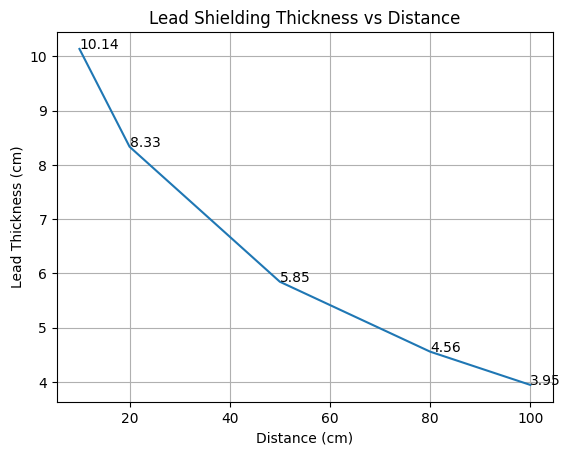

In [115]:
#Now for lead shielding thickness
# Load the lead attenuation data
df = pd.read_csv('lead_attenuation.csv')
df['Energy_Mev'] = df['Energy_Mev'].astype(float)
df['μ/ρ(cm2/g) '] = df['μ/ρ(cm2/g) '].astype(float)

# Convert energy from MeV to keV
df['Energy_Kev'] = df['Energy_Mev']
df['Energy_Kev'] = df['Energy_Kev'] * 1e3

# Linear interpolation
from scipy.interpolate import interp1d

# Load the photon energy and emission intensity data
df_photon = pd.read_csv('7314376.csv')
df_photon['Photon_Energy_Kev'] = df_photon['Photon_Energy_Kev'].astype(float)
df_photon['Emission_intensity_[%]'] = df_photon['Emission_intensity_[%]'].astype(float)

# Interpolate the attenuation coefficient
interpolator = interp1d(df['Energy_Kev'], df['μ/ρ(cm2/g) '], kind='linear', fill_value='extrapolate')
# Interpolate the attenuation coefficient for each photon energy in the emission spectrum
df_photon['Interpolated_μ/ρ(cm2/g)'] = interpolator(df_photon['Photon_Energy_Kev'])

# Calculate the thickness of lead required to reduce the detected intensity to 1e6 counts/s
target_intensity = 1e6  # counts/s
density_lead = 11.34  # g/cm^3

# Calculate the thickness of lead required to reduce the detected intensity to 1e6 counts/s
df_lead_thickness = pd.DataFrame(columns=['Distance (cm)', 'Lead_Thickness (cm)'])

for distance in distances:
    # Calculate the geometric efficiency
    epsilon = geometric_efficiency(detector_radius, distance)
    
    # Calculate the detected intensity
    detected_intensity = total_initial_intensity * epsilon
    
    # Calculate the thickness of lead required
    thickness = -np.log(target_intensity / detected_intensity) / (df_photon['Interpolated_μ/ρ(cm2/g)'] * density_lead)
    # Append to the DataFrame
    df_lead_thickness = pd.concat([df_lead_thickness, pd.DataFrame({'Distance (cm)': [distance], 'Lead_Thickness (cm)': [thickness.mean()]})], ignore_index=True)
    if distance == 10:
        print(f"Distance: {distance} cm, Detected Intensity: {detected_intensity:.2e} photons/s, Required Lead Thickness: {thickness.mean():.2e} cm")
    if distance == 20:
        print(f"Distance: {distance} cm, Detected Intensity: {detected_intensity:.2e} photons/s, Required Lead Thickness: {thickness.mean():.2e} cm")
        
    if distance == 50:
        print(f"Distance: {distance} cm, Detected Intensity: {detected_intensity:.2e} photons/s, Required Lead Thickness: {thickness.mean():.2e} cm")
    if distance == 80:
        print(f"Distance: {distance} cm, Detected Intensity: {detected_intensity:.2e} photons/s, Required Lead Thickness: {thickness.mean():.2e} cm")
    if distance == 100:
        print(f"Distance: {distance} cm, Detected Intensity: {detected_intensity:.2e} photons/s, Required Lead Thickness: {thickness.mean():.2e} cm")
        
print(df_lead_thickness)
plt.plot(df_lead_thickness['Distance (cm)'], df_lead_thickness['Lead_Thickness (cm)'])
plt.xlabel('Distance (cm)')
plt.ylabel('Lead Thickness (cm)')
plt.title('Lead Shielding Thickness vs Distance')
#put points on the graph
for i, txt in enumerate(df_lead_thickness['Lead_Thickness (cm)']):
    plt.annotate(f"{txt:.2f}", (df_lead_thickness['Distance (cm)'][i], df_lead_thickness['Lead_Thickness (cm)'][i]))
    
plt.grid()
plt.show()